#Data Cleaning and Transformation

In [ ]:
#Load data
import pandas as pd
import random
data = pd.read_csv('./files/problem_dataset.csv')

In [ ]:
# Remove the blank columns and unnecessary columns
data.drop('tce_rogue_flag', inplace=True, axis=1)
data.drop('tce_insol', inplace=True, axis=1)
data.drop('tce_insol_err', inplace=True, axis=1)
data.drop('kepid', inplace=True, axis=1)
# data.drop('tce_plnt_num', inplace=True, axis=1)

# Last column is labels(i.e. y), and rest are features(i.e. x)
# Shuffle data before partitioning


data = data.sample(frac=1) 
y = data['av_training_set']
x = data.drop('av_training_set', axis=1)

print(y)

# Partition dataset into training part and testing part
x_train = x[:13000].copy()
y_train = y[:13000].copy()
x_test = x[13000:].copy()
y_test = y[13000:].copy()



6073     NTP
14284     PC
10358    UNK
6454     AFP
14648    AFP
        ... 
6988      PC
14751    AFP
14107     PC
7159     AFP
1446     AFP
Name: av_training_set, Length: 15000, dtype: object


In [ ]:
def string_to_onehot(arr):  # Convert text labels to one-hot encoding for categorical classification
  int_arr = []

  for x in arr:
    if x=='AFP':
      int_arr.append([1,0,0,0])
    
    elif x=='NTP':
      int_arr.append([0,1,0,0])
    
    elif x=='PC':
      int_arr.append([0,0,1,0])
      
    elif x=='UNK':
      int_arr.append([0,0,0,1])
  
  return int_arr

def onehot_to_string(int_arr):  # Convert back one-hot to text
  arr = []

  for x in int_arr:
    if x==[1,0,0,0]:
      int_arr.append('AFP')
    
    elif x==[0,1,0,0]:
      int_arr.append('NTP')
    
    elif x==[0,0,1,0]:
      int_arr.append('PC')
      
    elif x==[0,0,0,1]:
      int_arr.append('UNK')

In [ ]:
y = pd.DataFrame(string_to_onehot(y))
print(y)

       0  1  2  3
0      0  1  0  0
1      0  0  1  0
2      0  0  0  1
3      1  0  0  0
4      1  0  0  0
...   .. .. .. ..
14995  0  0  1  0
14996  1  0  0  0
14997  0  0  1  0
14998  1  0  0  0
14999  1  0  0  0

[15000 rows x 4 columns]


In [ ]:
y_train.shape

(13000,)

In [ ]:
# Get the one-hot encoding for training and testing labels
y_train = string_to_onehot(y_train)
y_test = string_to_onehot(y_test)


: 

#Creating the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
import tensorflow as tf

model.add(tf.keras.layers.BatchNormalization(input_dim=22))
model.add(Dense(100, activation='relu'))

# model.add(Dense(25, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(25, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(25, activation='relu'))

model.add(Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.BatchNormalization())


model.add(Dense(40, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.BatchNormalization())

# model.add(Dense(30, activation='relu'))
# model.add(tf.keras.layers.Dropout(rate=0.3))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dense(20, activation='relu'))
# model.add(tf.keras.layers.Dropout(rate=0.3))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dense(10, activation='relu'))

# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 22)               88        
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 100)               2300      
                                                                 
 dense_16 (Dense)            (None, 512)               51712     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 100)              

In [ ]:
model_1 = Sequential()
model_1.add(Dense(32, input_dim=22, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(4, activation='softmax'))


model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                736       
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                                 
 dense_22 (Dense)            (None, 4)                 260       
                                                                 
Total params: 3,108
Trainable params: 3,108
Non-trainable params: 0
_________________________________________________________________


#Training the Model

In [ ]:
import tensorflow as tf
trainer = tf.keras.optimizers.SGD(learning_rate=0.45)

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
model_1.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(y_train)
y_train = pd.DataFrame(y_train)
print(y_train)

       0  1  2  3
0      0  0  1  0
1      1  0  0  0
2      0  1  0  0
3      1  0  0  0
4      1  0  0  0
...   .. .. .. ..
12995  0  0  0  1
12996  1  0  0  0
12997  1  0  0  0
12998  1  0  0  0
12999  0  0  1  0

[13000 rows x 4 columns]
       0  1  2  3
0      0  0  1  0
1      1  0  0  0
2      0  1  0  0
3      1  0  0  0
4      1  0  0  0
...   .. .. .. ..
12995  0  0  0  1
12996  1  0  0  0
12997  1  0  0  0
12998  1  0  0  0
12999  0  0  1  0

[13000 rows x 4 columns]


In [ ]:
hist = model.fit(x, y, epochs=100, batch_size=500)

Epoch 1/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3878 - accuracy: 0.8396
Epoch 2/100
30/30 [==============================] - 1s 21ms/step - loss: 0.3946 - accuracy: 0.8347
Epoch 3/100
30/30 [==============================] - 1s 19ms/step - loss: 0.3933 - accuracy: 0.8347
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3854 - accuracy: 0.8398
Epoch 5/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3838 - accuracy: 0.8414
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3812 - accuracy: 0.8437
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.4058 - accuracy: 0.8350
Epoch 8/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3883 - accuracy: 0.8399
Epoch 9/100
30/30 [==============================] - 1s 21ms/step - loss: 0.3888 - accuracy: 0.8365
Epoch 10/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3900 - accuracy: 0.8406

In [ ]:
model.save('files/model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


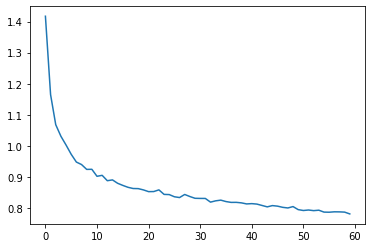

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(hist.history)
# use Pandas native plot method to plot loss vs epochs
history_df['loss'].plot();

#Predicting the Labels

In [ ]:
y_test = pd.DataFrame(y_test)
loss, accuracy = model.evaluate(x_test,y_test)    #testing
print("Model accuracy: %.2f"% (accuracy*100))

63/63 [==============================] - 0s 2ms/step - loss: 1.4221 - accuracy: 0.6020
Model accuracy: 60.20


In [ ]:
print(accuracy)

1.4221160411834717


In [ ]:
print(loss)